<a href="https://colab.research.google.com/github/kdemertzis/LNexamples/blob/main/Sweetviz_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fast & powerful EDA **in notebooks** using Sweetviz 2.0 (full usage docs)
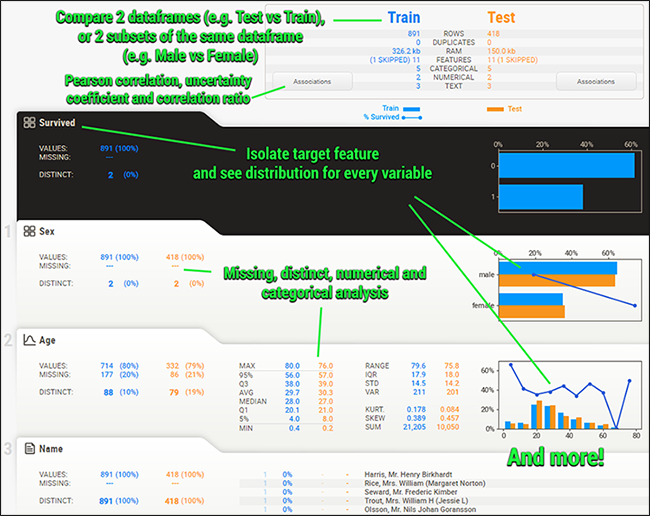

Sweetviz is an open-source Python library that generates beautiful, high-density visualizations to kickstart EDA (Exploratory Data Analysis) with just **two lines of code**!

In addition to detailed feature analysis, it stands out from other EDA packages by providing:
1.   **Target analysis:** shows how a target value (e.g. "Survived" in the Titanic dataset) relates to other features
2.   **Dataset comparisons:** e.g. "Train vs Test" and intra-set "Male vs Female"
3.   **Correlation/associations:** full integration of numerical and categorical data correlations and associations, all in one graph and table

New with version 2.0, in addition to standalone HTML applications (as in the previous version), is that these visualizations can now be **embedded in Colab/Jupyter-style notebooks**.

This notebook will document its usage and features, as well as show a few use case examples.

**Questions?** *Something missing or broken? Help keep improving this notebook! Please don't hesitate to let me know of any issues, questions and feedback in our [GitHub issues & discussion forums](https://github.com/fbdesignpro/sweetviz/discussions).*

# Install and upgrade
To use sweetviz, simply install the package from `pip` (alternatively, you can also download/fork the code base from [Github](https://github.com/fbdesignpro/sweetviz)). You can do this within your Python environment, or inside a notebook using shell commands ("`!`"):

In [26]:
!pip install sweetviz

#### Upgrading
Although `pip` features an `upgrade` command-line parameter, some users have reported issues so it is best to proceed by uninstalling the package (`pip uninstall sweetviz`), then reinstalling.

# Basic usage
Once installed, you just need to `import` the module. Then, using sweetviz is a simple two-step process:
1. Create a `DataframeReport` object using one of: `analyze()`, `compare()` or `compare_intra()`
2. Use a `show_xxx()` function to render the report. You can now use either **html** or **notebook** report options, as well as apply **scaling**.

Let's get started and import sweetviz, pandas, and the "Titanic" dataset, which we will use for this notebook:

In [27]:
import sweetviz as sv
import pandas as pd
train_df = pd.read_csv('https://raw.githubusercontent.com/kdemertzis/datashare/main/virus_train.csv')
test_df = pd.read_csv('https://raw.githubusercontent.com/kdemertzis/datashare/main/virus_test.csv')

We will start with a basic comparison of our training and testing sets, using the 2 steps mentioned above:

In [30]:
# Step 1: Generate the report
# We are giving names to each dataset (optional), and specifying a target feature (optional also)
# Specifying a target feature is extremely valuable as it will show how "Survived" is affected by each variable
my_report = sv.compare([train_df, "Train"], [test_df, "Test"], "class")
comparison_report = sv.compare([train_df,'Train'], [test_df,'Test'], target_feat='class')

                                             |          | [  0%]   00:00 -> (? left)

                                             |          | [  0%]   00:00 -> (? left)

In [31]:
# Step 2: Show the report
# The report can be output as a standalone HTML file, OR embedded in this notebook.
# For notebooks, we can specify the width, height of the window, as well as scaling of the report itself.
#comparison_report.show_notebook() # Using the default values (w="100%", h=750, layout="vertical"), all can be overridden in an INI, see below)
my_report.show_html("Report.html") # Not providing a filename will default to SWEETVIZ_REPORT.html

Report Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Vertical vs Widescreen layouts
Both Notebook and HTML reports can use a vertical or widescreen layout. The same information is displayed, but in the vertical layout users must click on a specific feature to see the detail, whereas in widescreen mode, data is displayed as soon as the mouse goes over any feature and this view can be locked-in by clicking. Widescreen needs more horizontal real estate to work, though.

We will get into the width and height options just below, but here is a quick example of both layouts:

In [ ]:
# Using UNPRACTICALLY SMALL windows & scales, just to showcase the two layouts!
comparison_report.show_notebook(layout='widescreen', w=1500, h=300, scale=0.7) 
comparison_report.show_notebook(layout='vertical', w=800, h=300, scale=0.7) 

# Layout options for show_notebook()
So, before digging into the report content itself, let's look at the different ways the report can be customized to best fit your setup, as everyone's setup and personal preferences are different.

## Notebook window size (`w` & `h` parameters)
The width (`w`) and height (`h`) of the window showing the report in a notebook can be customized. Both parameters can take a **number value** indicating a **size in pixels**, e.g. `w=800` or `h=750`.

The width can also be expressed as a **percentage of the width of the screen**, using a string argument, e.g. `w='80%'`

The height also has a special option. Using `h='FULL'` will make the report and take as much height as possible. Note: some notebooks will cut off the height of Windows that are too tall.

## Scaling (`scale` parameter)
Separate from the window size, the report itself can be scaled using the scale parameter. The **scale is expressed as a fractional number**, with `scale=1.0` representing "actual size".

You saw these in action above, let's do one last example:

In [ ]:
# Compact window, with compact report!
comparison_report.show_notebook(w=900, h=700, scale=0.8) 

# New layout options for show_html()
Note that the function `show_html()` is still available in all cases, whether from notebooks or a regular IDE.

In fact, `show_html()` has been upgraded with the same `scale` and `layout` options, so **regular HTML reports can now also be scaled and use a vertical layout**!

# The 3 Report types: analyze(), compare(), compare_intra()
Sweetviz provides these 3 report types. **Each report type can optionally include a "target" variable** that displays the distribution of a target feature over every other feature. Each also generates association/interaction stats and graphs.

# analyze()
Use this version when there is only a single dataset to analyze, and you do **not** wish to compare subpopulations together (e.g. male vs female)
```
analyze(source: Union[pd.DataFrame, Tuple[pd.DataFrame, str]],
        target_feat: str = None,
        feat_cfg: FeatureConfig = None,
        pairwise_analysis: str = 'auto'):
```
The analyze() function can take multiple other arguments:
* **source**: either the data frame (as in the example) or a tuple containing the data frame and a name to show in the report. e.g. my_df or [my_df, "Training"]
* **target_feat**: a string representing the name of the feature to be marked as "target". Only BOOLEAN and NUMERICAL features can be targets for now.
* **pairwise_analysis**: Correlations and other associations can take quadratic time (n^2) to complete. The default setting (`"auto"`) will run without warning until a data set contains "association_auto_threshold" features. Past that threshold, you need to explicitly pass the parameter `pairwise_analysis="on"` (or `="off"`) since processing that many features would take a long time. This parameter also covers the generation of the association graphs (based on Drazen Zaric's concept) that will be covered below.

* **feat_cfg**: a `sweetviz.FeatureConfig` object representing features to be skipped, or to be forced a certain type in the analysis. The arguments can either be a single string or list of strings. 
### Using `feat_cfg` to force data types or skip columns
Possible parameters for the FeatureConfig parameters are:
* skip
* force_cat
* force_num
* force_text

The "force_" arguments override the built-in type detection. They can be constructed as follows:
```
feature_config = sv.FeatureConfig(skip="PassengerId", force_text=["Age"])
```


In [ ]:
# Here is an example of feature_config to skip the PassengerId feature, and force age to be interpreted as categories:
# -> Using a SMALL WINDOW just to show the concept!
feature_config = sv.FeatureConfig(skip="PassengerId", force_text=["Age"])
analyze_report = sv.analyze([train_df,'Train'], 'Survived',  feature_config)
analyze_report.show_notebook(w=900, h=450, scale=0.8)

# compare()
Use this version when you have 2 data sets to compare together (e.g. Train versus Test). **This is a very useful report!**
```
compare(source: Union[pd.DataFrame, Tuple[pd.DataFrame, str]],
            compare: Union[pd.DataFrame, Tuple[pd.DataFrame, str]],
            target_feat: str = None,
            feat_cfg: FeatureConfig = None,
            pairwise_analysis: str = 'auto')
```
The parameters are the same as `analyze()`, with the addition of a `compare` parameter. Usage was demonstrated in the "Basic Usage" section at the beginning.

# compare_intra()
Use this when you want to compare 2 some populations within the **same** dataset. This is also a **very useful report**, especially when coupled with **target feature** analysis!

In our Titanic example, we could use it to compare the male vs female populations, and see if survivability is affected by different factors that are ALSO gender-specific.

```
compare_intra(source_df: pd.DataFrame,
                  condition_series: pd.Series,
                  names: Tuple[str, str],
                  target_feat: str = None,
                  feat_cfg: FeatureConfig = None,
                  pairwise_analysis: str = 'auto')
```
The parameters are once again similar, however this time you must also provide you provide a **boolean test** (`'condition_series'`) that splits the population (here we use `train["Sex"] == 'male'`, to get a sense of the different gender populations), and give a name to each subpopulation.

The `names` Tuple is for the populations given by the conditional series in order: [TRUE, FALSE].

In [ ]:
# Example comparing the male and female populations
# -> Using SMALL WINDOW just to show the concept!
intra_report = sv.compare_intra(train_df, train_df["Sex"] == 'male', ["Male", "Female"], 'Survived')
intra_report.show_notebook(w=900, h=450, scale=0.8)

# .INI file overrides: setting defaults and other options
The package contains an INI file for configuration. You can override any setting by providing your own then calling this before creating a report:
```
sv.config_parser.read("Override.ini")
```
**IMPORTANT #1**: it is best to load overrides before any other command, as many of the INI options are used in the report generation.

**IMPORTANT #2**: values in the INI are separated with a header (e.g. `[General]`). **Always** set the header before the value, otherwise there will be an error.

**IMPORTANT #3**: note the double '%' if specifying a percentage string (see `notebook_width` below).

You can look into the file `sweetviz_defaults.ini` for what can be overriden (warning: much of it is a work in progress and not well documented), but the most useful overrides are as follows.

```
[General]
; Set this to 1 to support Chinese, Japanese, Korean characters better
use_cjk_font = 0
association_min_to_bold = 0.1

[Output_Defaults]
html_layout = widescreen
html_scale = 1.0
notebook_layout = vertical
notebook_scale = 1.0
notebook_width = 100%%
notebook_height = 750

[Layout]
show_logo = 1

[Type_Detection]
; Numeric columns will be considered CATEGORICAL if fewer than this many distinct
max_numeric_distinct_to_be_categorical = 10
; Text columns will be considered TEXT if more than this many distinct (CATEGORICAL otherwise)
max_text_distinct_to_be_categorical = 101
; Text columns will be considered TEXT if more than this fraction are distinct
max_text_fraction_distinct_to_be_categorical = 0.33
```

Note that your `Override.ini` **does not need to contain every value**, and could be something like:

```
[General]
use_cjk_font = 0

[Output_Defaults]
notebook_layout = widescreen
notebook_scale = 0.8
```


# That's it! What next?
I hope you will find sweetviz as incredibly useful to use as I do, thank you for checking it out!
* For tips on **getting the most insights** from sweetviz, [check out this in-depth article on medium.com](https://towardsdatascience.com/powerful-eda-exploratory-data-analysis-in-just-two-lines-of-code-using-sweetviz-6c943d32f34)
* **If you have any feedback or questions** on this document or sweetviz, please don't hesitate to let me know of any issues, questions and feedback in our [GitHub issues & discussion forums](https://github.com/fbdesignpro/sweetviz/discussions).